In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline 

import opendatasets as od

In [ ]:
#to download the dataset from kaggle
od.download('https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data?select=ds_salaries.csv')

#alternatively, you can download from the url: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data?select=ds_salaries.csv

In [2]:
#read the data
salaries=pd.read_csv("./data-science-salaries-2023/ds_salaries.csv")
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# Exploratory Data Analysis

In [3]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [4]:
salaries.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
salaries.columns = salaries.columns.str.lower().str.replace(' ', '_')
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [8]:
non_numerical_cols=['experience_level', 'employment_type', 'job_title','salary_currency', 'employee_residence','company_location', 'company_size']
for col in non_numerical_cols:
    print (col)
    print ()
    print (salaries[col].value_counts())

experience_level

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64
employment_type

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64
job_title

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64
salary_currency

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1


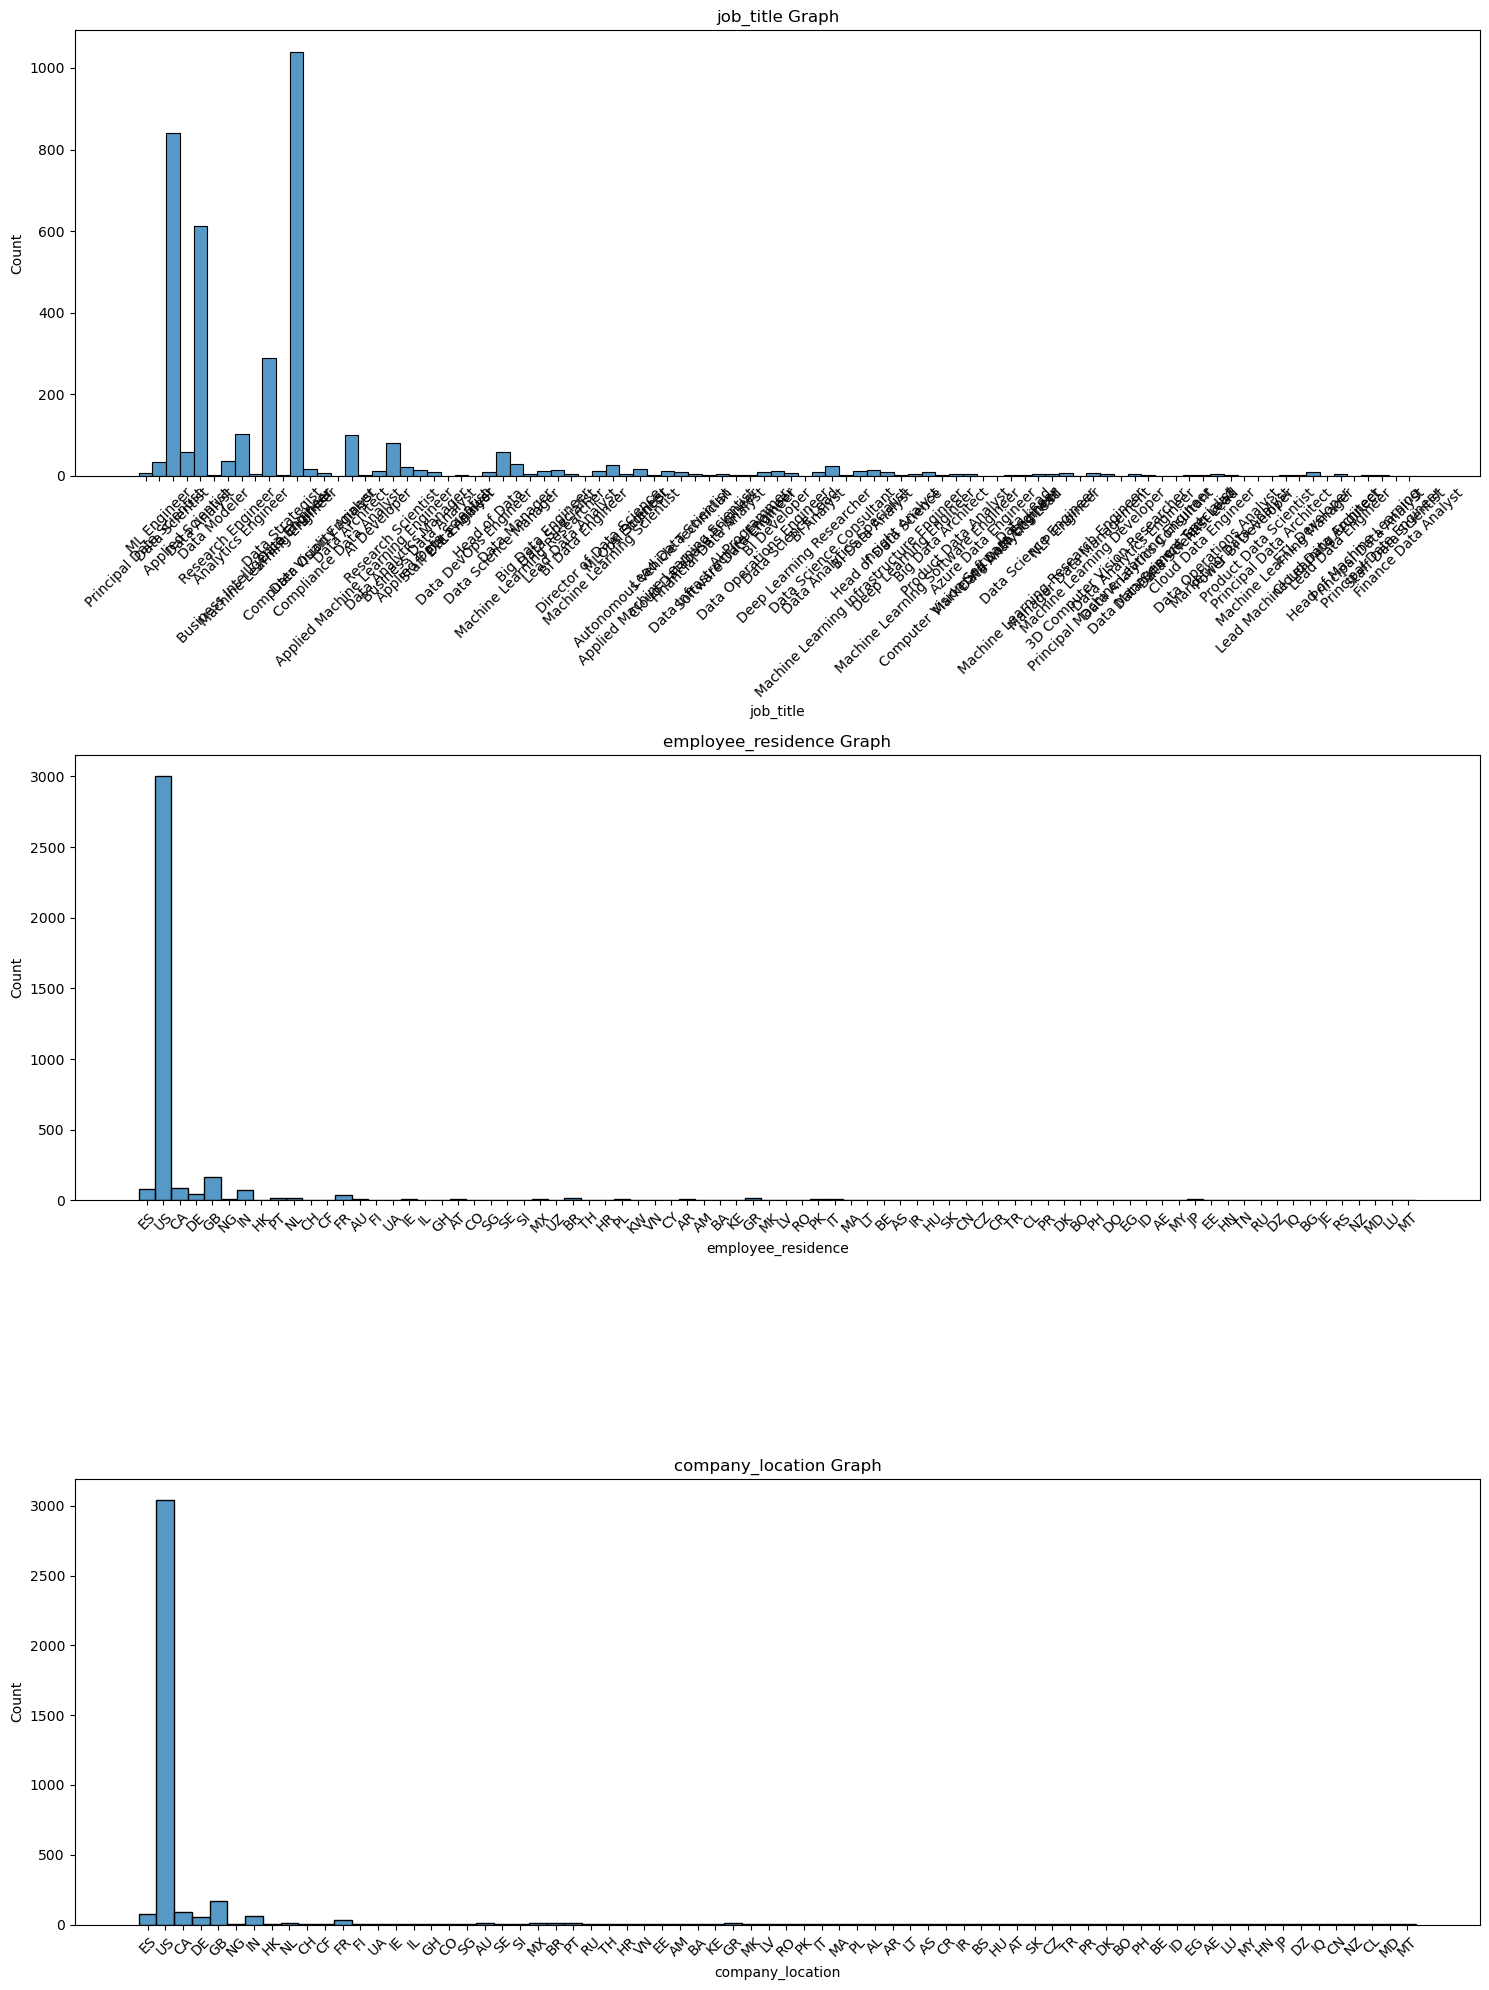

In [31]:
non_numerical_cols = ['job_title', 'employee_residence', 'company_location']

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 1

# Create a new figure
plt.figure(figsize=(15, 20))

position = 1

for col in non_numerical_cols:
    plt.subplot(num_rows, num_cols, position)
    sns.histplot(salaries[col])
    plt.xlabel(col)
    plt.title(f"{col} Graph")
    plt.xticks(rotation = 45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()

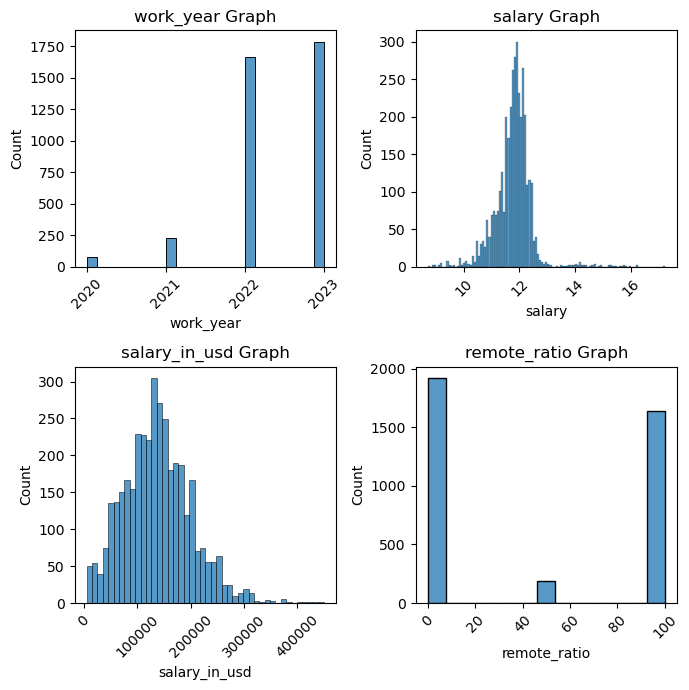

In [32]:
numerical_cols = ['work_year', 'salary', 'salary_in_usd','remote_ratio']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create a new figure
plt.figure(figsize=(7, 7))

position = 1

for col in numerical_cols:
    plt.subplot(num_rows, num_cols, position)
    sns.histplot(salaries[col])
    plt.xlabel(col)
    plt.title(f"{col} Graph")
    plt.xticks(rotation = 45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()

C:\Users\adeye\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


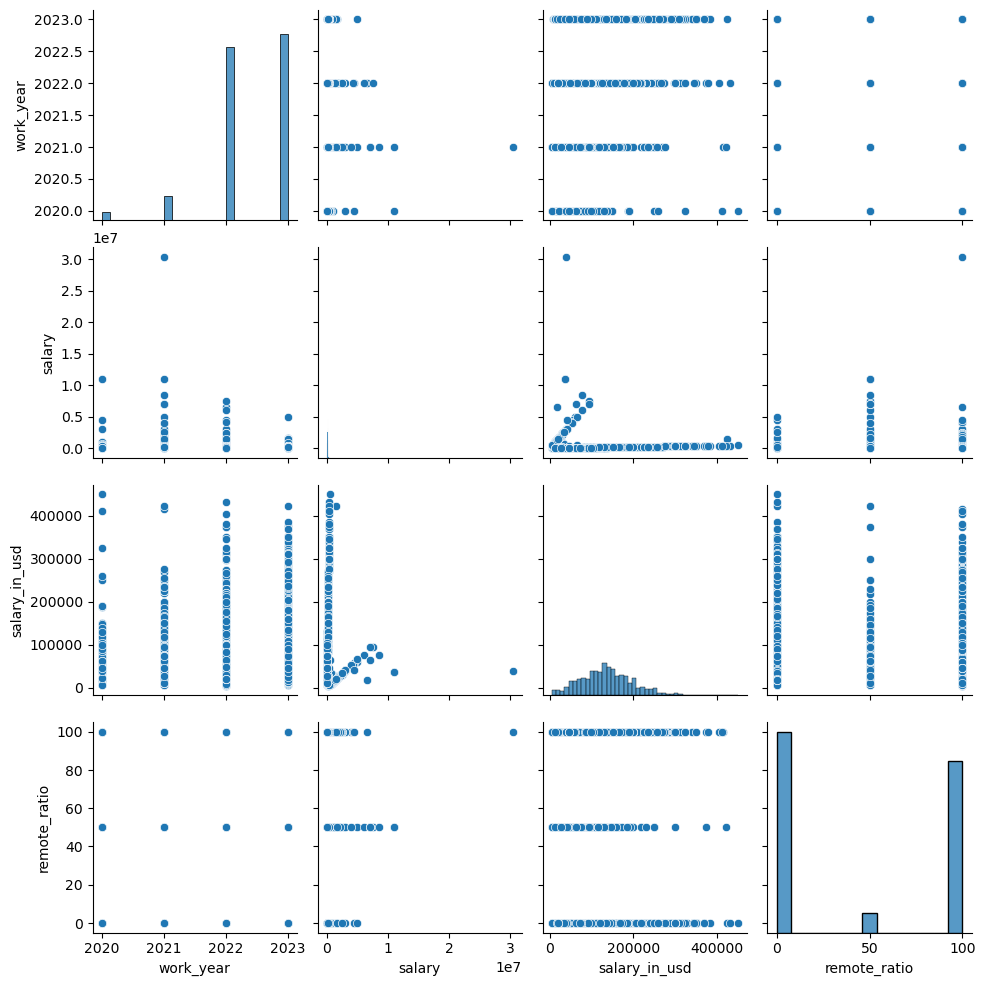

In [11]:
sns.pairplot(salaries)

In [12]:
salaries["salary"].mean()

190695.57177097205

In [13]:
salaries["salary"]=np.log1p(salaries.salary.values)
salaries["salary"].mean()

11.775067580795513

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(salaries, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
len(salaries), len(df_train) +len(df_val) +len(df_test)

(3755, 3755)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.salary.values
y_val = df_val.salary.values
y_test = df_test.salary.values

del df_train['salary']
del df_val['salary']
del df_test['salary']

In [19]:
from sklearn.feature_extraction import DictVectorizer

In [20]:
dv = DictVectorizer(sparse=True)


train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## DecisionTreeRegressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn import metrics
from sklearn import tree

In [22]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [23]:
y_pred = dt.predict(X_val)
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

RMSE: 0.5362050348419425


In [25]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- salary_in_usd <= 124750.00
|   |--- value: [11.39]
|--- salary_in_usd >  124750.00
|   |--- value: [12.07]



[Text(0.5, 0.75, 'x[238] <= 124750.0\nsquared_error = 0.427\nsamples = 2253\nvalue = 11.788'),
 Text(0.25, 0.25, 'squared_error = 0.664\nsamples = 947\nvalue = 11.394'),
 Text(0.75, 0.25, 'squared_error = 0.061\nsamples = 1306\nvalue = 12.073')]

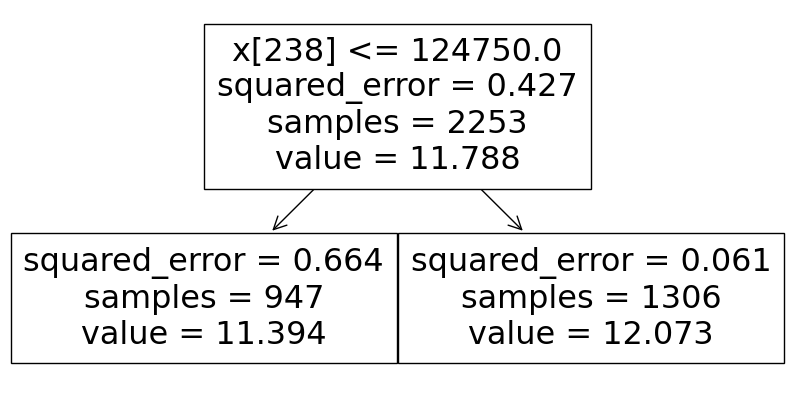

In [26]:
plt.rcParams['figure.figsize'] = [10, 5]
tree.plot_tree(dt)

In [27]:
scores = []

for d in [10, 15,20,25]:
    for s in range(10, 201, 10):
        for l in range(10,201,10):
            dt = DecisionTreeRegressor(max_depth=d,
                                       min_samples_split=s,
                                       min_samples_leaf=l,
                                        random_state=1)
            dt.fit(X_train, y_train)

            y_pred = dt.predict(X_val)
            rmse = np.sqrt(metrics.mean_squared_error(y_val,y_pred))

            scores.append((d, s,l, rmse))

In [28]:
df_scores = pd.DataFrame(scores, columns=['max_depth','min_samples_split','min_samples_leaf', 'rmse'])
df_scores

,max_depth,min_samples_split,min_samples_leaf,rmse
0,10,10,10,0.124459
1,10,10,20,0.183829
2,10,10,30,0.185867
3,10,10,40,0.304547
4,10,10,50,0.304748
...,...,...,...,...
1595,25,200,160,0.484470
1596,25,200,170,0.485401
1597,25,200,180,0.485391
1598,25,200,190,0.485365


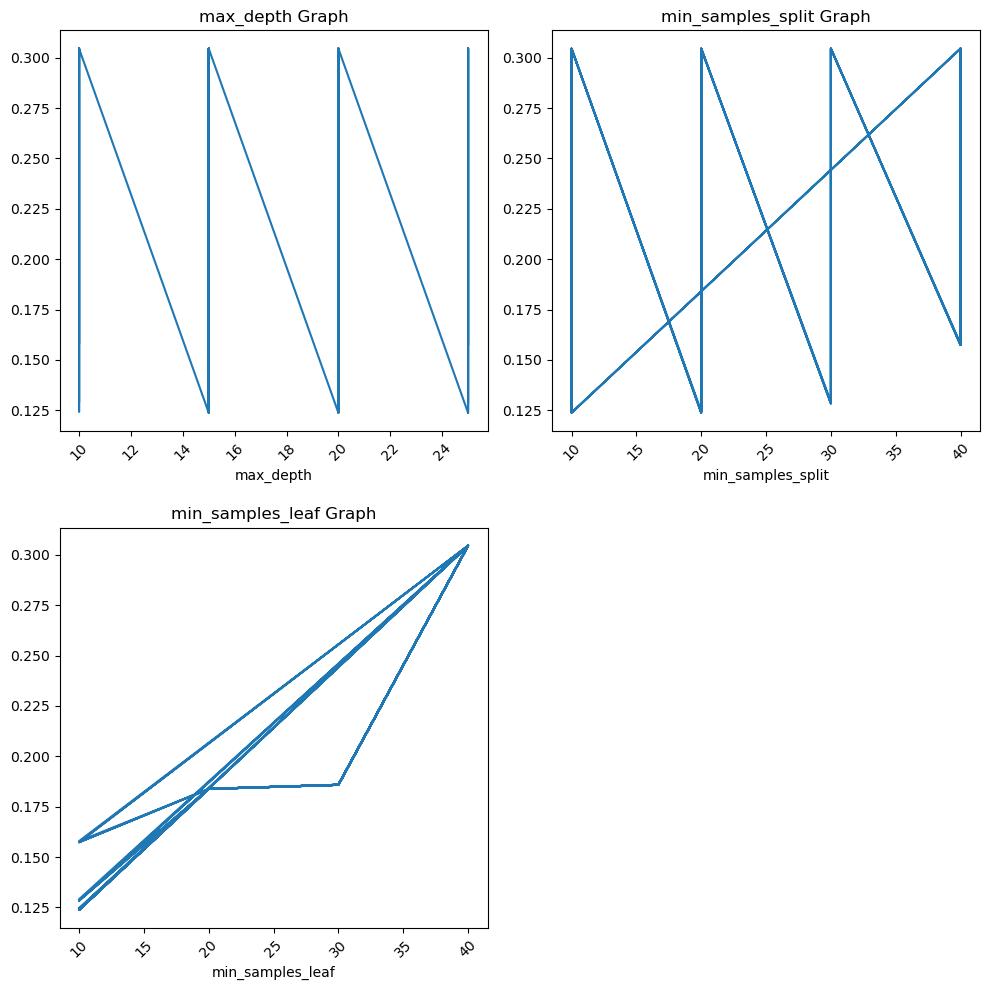

In [33]:
# Define the list of parameters
parameters = ['max_depth', 'min_samples_split', 'min_samples_leaf']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create a new figure
plt.figure(figsize=(10, 10))

position = 1

for parameter in parameters:
    plt.subplot(num_rows, num_cols, position)
    plt.plot(df_scores[parameter], df_scores['rmse'])  # Use 'rmse' as a string
    plt.xlabel(parameter)
    plt.title(f"{parameter} Graph")
    plt.xticks(rotation=45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()


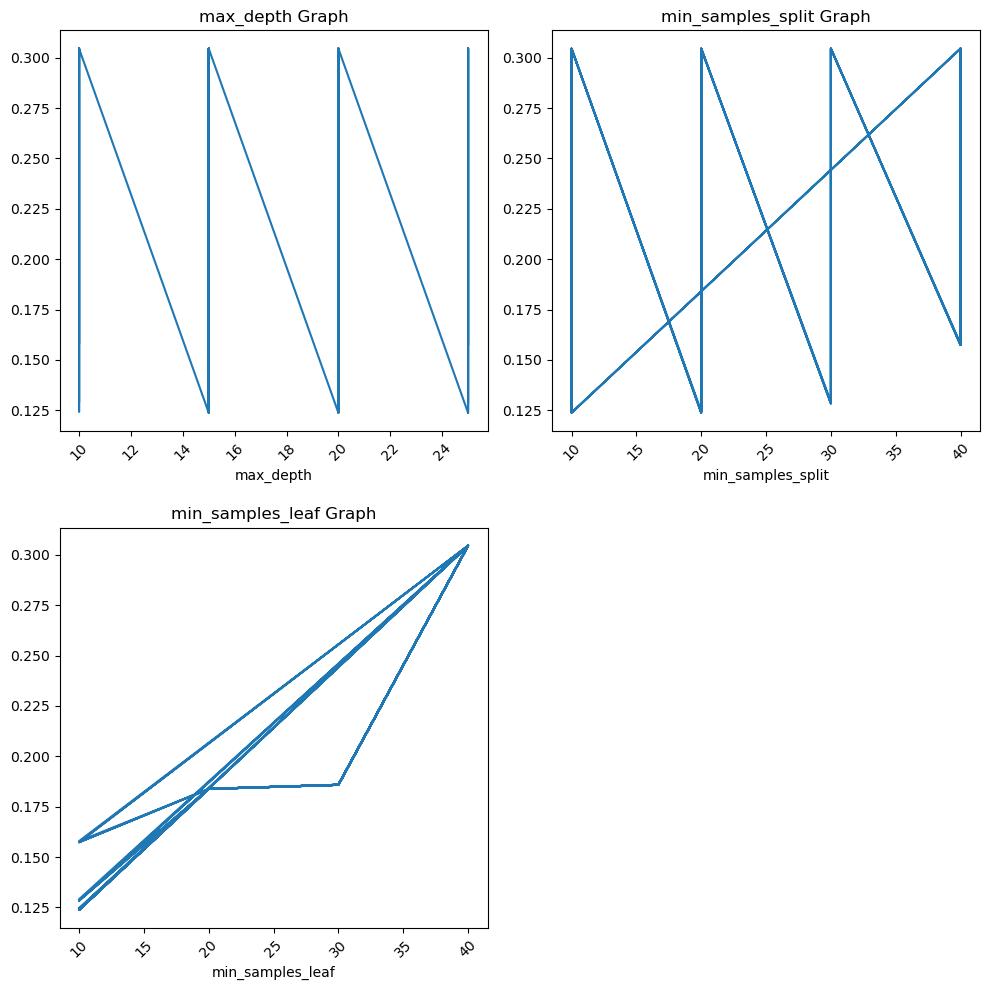

In [34]:
scores = []

for d in [10, 15,20,25]:
    for s in range(10, 50, 10):
        for l in range(10,50,10):
            dt = DecisionTreeRegressor(max_depth=d,
                                       min_samples_split=s,
                                       min_samples_leaf=l,
                                        random_state=1)
            dt.fit(X_train, y_train)

            y_pred = dt.predict(X_val)
            rmse = np.sqrt(metrics.mean_squared_error(y_val,y_pred))

            scores.append((d, s,l, rmse))
            
df_scores = pd.DataFrame(scores, columns=['max_depth','min_samples_split','min_samples_leaf', 'rmse'])

# Define the list of parameters
parameters = ['max_depth', 'min_samples_split', 'min_samples_leaf']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create a new figure
plt.figure(figsize=(10, 10))

position = 1

for parameter in parameters:
    plt.subplot(num_rows, num_cols, position)
    plt.plot(df_scores[parameter], df_scores['rmse'])  # Use 'rmse' as a string
    plt.xlabel(parameter)
    plt.title(f"{parameter} Graph")
    plt.xticks(rotation=45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()


In [35]:
dt = DecisionTreeRegressor(max_depth=10,
                                       min_samples_split=20,
                                       min_samples_leaf=10,
                                        random_state=1)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

RMSE: 0.12445901874422848


## RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor(n_estimators=10,
                            random_state=1,
                           n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [38]:
y_pred = rf.predict(X_val)

In [39]:
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

RMSE: 0.11452430151746737


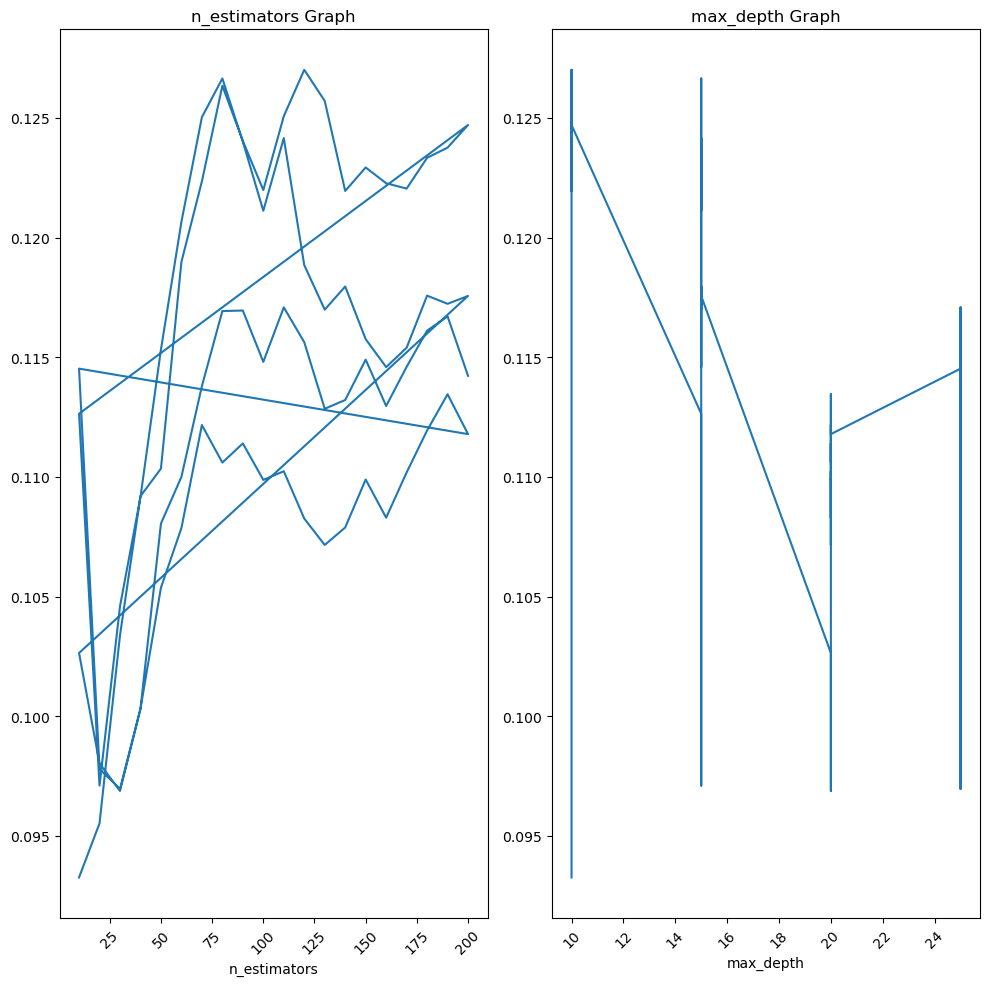

In [41]:
scores = []

for d in [10, 15,20,25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                  n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(metrics.mean_squared_error(y_val,y_pred))

        scores.append((n, d, rmse))

               
df_scores = pd.DataFrame(scores, columns=['n_estimators','max_depth', 'rmse'])


# Define the list of parameters
parameters = ['n_estimators','max_depth']

# Define the number of rows and columns for subplots
num_rows = 1
num_cols = 2

# Create a new figure
plt.figure(figsize=(10, 10))

position = 1

for parameter in parameters:
    plt.subplot(num_rows, num_cols, position)
    plt.plot(df_scores[parameter], df_scores['rmse'])  # Use 'rmse' as a string
    plt.xlabel(parameter)
    plt.title(f"{parameter} Graph")
    plt.xticks(rotation=45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()


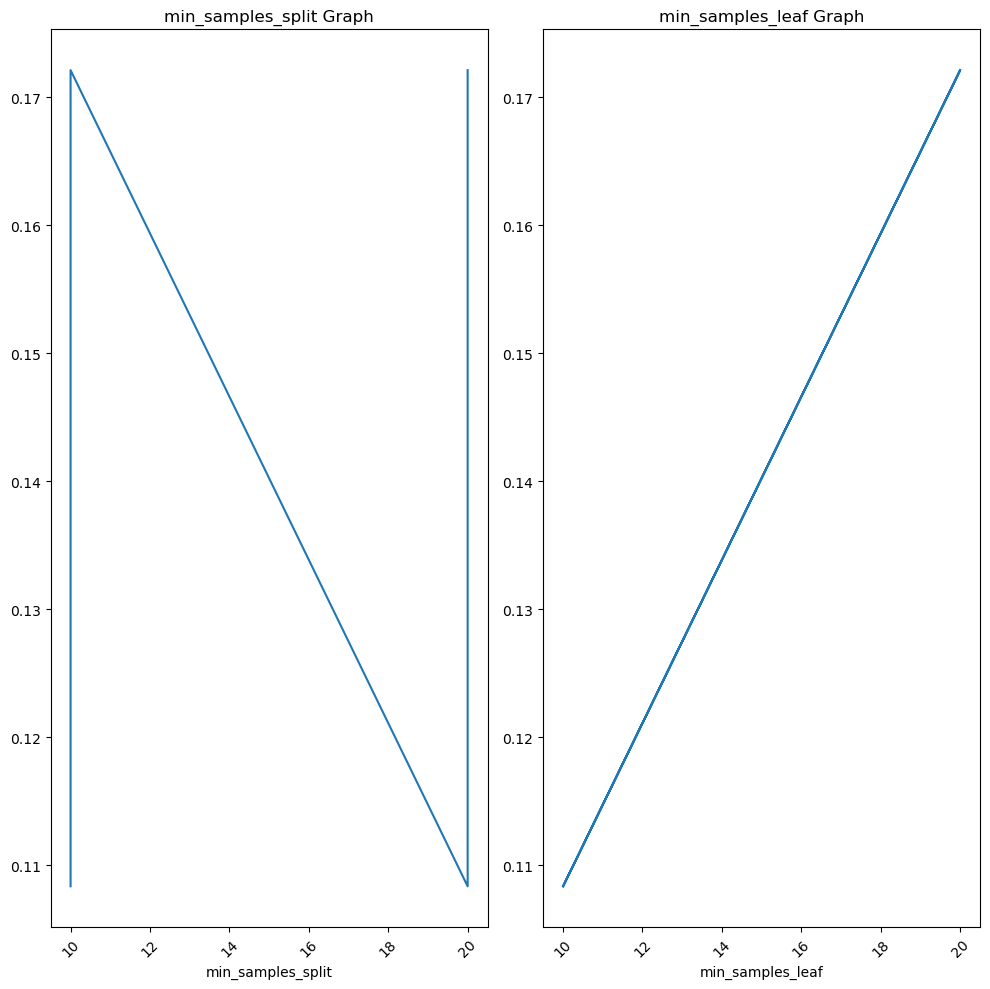

In [42]:
scores = []

for s in range(10, 26, 10):
    for l in range(10,26,10):
         rf = RandomForestRegressor(n_estimators=10,
                                            max_depth=10,
                                           min_samples_split=s,
                                           min_samples_leaf=l,
                                            random_state=1,
                                          n_jobs=-1)
         rf.fit(X_train, y_train)

         y_pred = rf.predict(X_val)
         rmse = np.sqrt(metrics.mean_squared_error(y_val,y_pred))

         scores.append((s, l, rmse))
                
df_scores = pd.DataFrame(scores, columns=['min_samples_split','min_samples_leaf', 'rmse'])


# Define the list of parameters
parameters = ['min_samples_split','min_samples_leaf']

# Define the number of rows and columns for subplots
num_rows = 1
num_cols = 2

# Create a new figure
plt.figure(figsize=(10, 10))

position = 1

for parameter in parameters:
    plt.subplot(num_rows, num_cols, position)
    plt.plot(df_scores[parameter], df_scores['rmse'])  # Use 'rmse' as a string
    plt.xlabel(parameter)
    plt.title(f"{parameter} Graph")
    plt.xticks(rotation=45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()


In [43]:
rf = RandomForestRegressor(n_estimators=10,
                                            max_depth=10,
                                           min_samples_split=10,
                                           min_samples_leaf=10,
                                            random_state=10,
                                          n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

RMSE: 0.11585508608780493


## XGBoost

In [46]:
import xgboost as xgb

In [47]:
features = list(dv.get_feature_names_out())
features

['company_location=AE',
 'company_location=AM',
 'company_location=AR',
 'company_location=AT',
 'company_location=AU',
 'company_location=BE',
 'company_location=BR',
 'company_location=BS',
 'company_location=CA',
 'company_location=CF',
 'company_location=CH',
 'company_location=CN',
 'company_location=CO',
 'company_location=CR',
 'company_location=CZ',
 'company_location=DE',
 'company_location=DK',
 'company_location=DZ',
 'company_location=EE',
 'company_location=EG',
 'company_location=ES',
 'company_location=FI',
 'company_location=FR',
 'company_location=GB',
 'company_location=GH',
 'company_location=GR',
 'company_location=HK',
 'company_location=HN',
 'company_location=HR',
 'company_location=HU',
 'company_location=ID',
 'company_location=IE',
 'company_location=IL',
 'company_location=IN',
 'company_location=IQ',
 'company_location=IT',
 'company_location=JP',
 'company_location=LT',
 'company_location=LV',
 'company_location=MT',
 'company_location=MX',
 'company_locati

In [48]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [49]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [50]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,


    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [51]:
y_pred = model.predict(dval)

In [52]:
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

RMSE: 0.12787592760223174


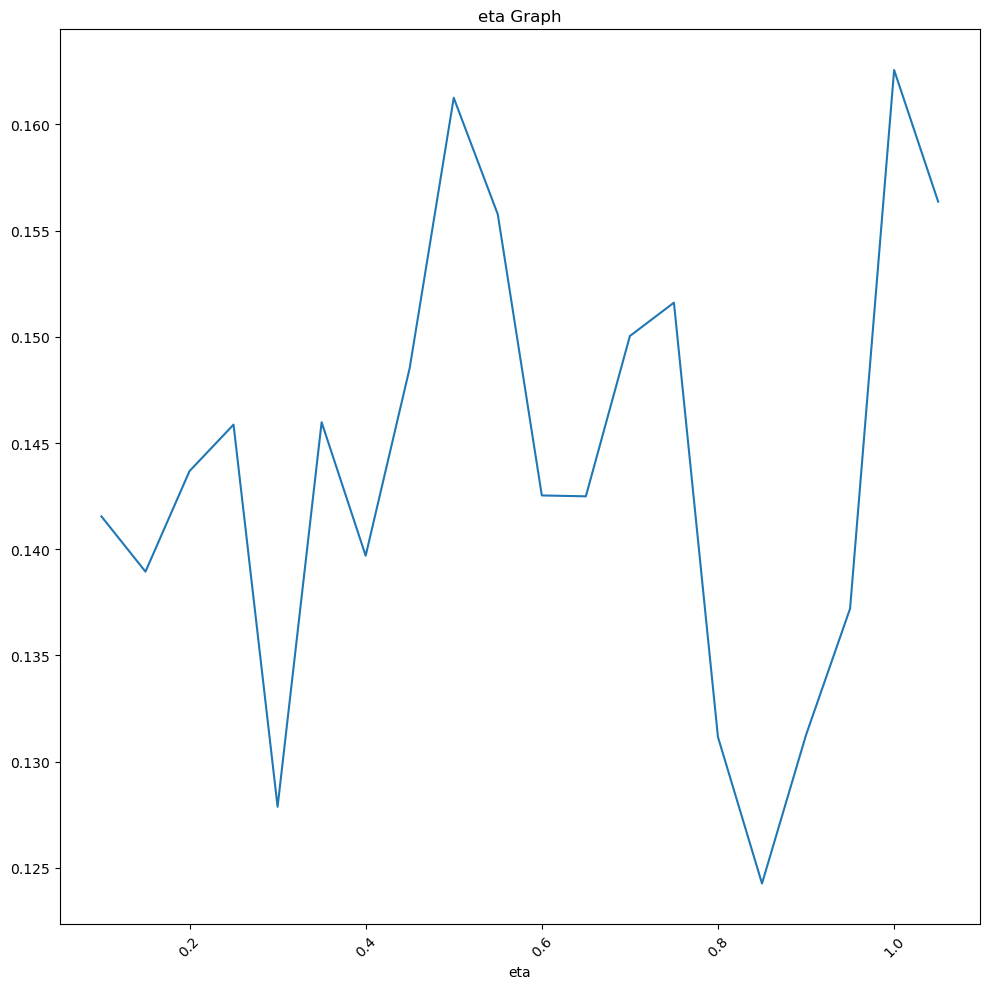

In [53]:
scores = []

eta_values = [0.1 + i * 0.05 for i in range(20)]
for eta in eta_values:
    xgb_params = {
    'eta': eta, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,


    'seed': 1,
    'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=100)
    y_pred = model.predict(dval)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,y_pred))
    scores.append((eta,rmse))
                
df_scores = pd.DataFrame(scores, columns=['eta', 'rmse'])


# Define the list of parameters
parameters = ['eta']

# Define the number of rows and columns for subplots
num_rows = 1
num_cols = 1

# Create a new figure
plt.figure(figsize=(10, 10))

position = 1

for parameter in parameters:
    plt.subplot(num_rows, num_cols, position)
    plt.plot(df_scores[parameter], df_scores['rmse'])  # Use 'rmse' as a string
    plt.xlabel(parameter)
    plt.title(f"{parameter} Graph")
    plt.xticks(rotation=45)
    position = position + 1

# Adjust the layout and add a super title
plt.tight_layout()
plt.show()

In [54]:
%%capture output

xgb_params = {
    'eta': 0.85, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,


    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = model.predict(dval)


In [55]:
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

RMSE: 0.12426371823152568
